# Теория вероятностей и математическая статистика
## Курсовая работа

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Disclaimer
В данной работе я ставлю перед собой цель опробовать на практике полученные в ходе курса навыки. Исходным датасетом является IMDb.com.
Датасет беру с [kaggle](https://www.kaggle.com/crescenzo/imdb-movies-through-2018) <br/>
В датасете присутствуют три признака:
- Название фильма
- Год
- Жанр

Исходя из этих данных, хочу поставить следующие гипотезы:
1.  Чем моложе фильм, тем короче его название
2.  Во временя 1ой и 2ой мировых войн документальных фильмов производилось больше
3.  Вне войн снимали больше драм

Скачаем и распакуем необходимый датасет:

In [45]:
tsv_path = '../teorver/csv/IMDB_Data.csv'

In [120]:
df = pd.read_csv(tsv_path)

In [121]:
df.shape

(487628, 5)

### Чем моложе фильм, тем короче его название
#### Подготовка и очистка

Проверим датасет на наличие пустых полей

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487628 entries, 0 to 487627
Data columns (total 5 columns):
ID         487628 non-null object
TITLE      487628 non-null object
YEAR       441150 non-null float64
RUNTIME    305022 non-null float64
GENRE      414531 non-null object
dtypes: float64(2), object(3)
memory usage: 18.6+ MB


В признаке `YEAR` есть пустые значения. Выкинем их

In [123]:
df.dropna(subset=['YEAR'], inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441150 entries, 0 to 441149
Data columns (total 5 columns):
ID         441150 non-null object
TITLE      441150 non-null object
YEAR       441150 non-null float64
RUNTIME    301813 non-null float64
GENRE      369431 non-null object
dtypes: float64(2), object(3)
memory usage: 20.2+ MB


Посмотрим на значения, которые принимает год:

In [125]:
df.describe()

,YEAR,RUNTIME
count,441150.000000,301813.000000
mean,1986.373134,87.887424
std,30.230542,107.648573
min,1894.000000,1.000000
25%,1967.000000,73.000000
50%,1997.000000,89.000000
75%,2012.000000,100.000000
max,2115.000000,51420.000000


Видим, что есть значения вплоть до 2115, чего явно быть не может. Давайте срежем датасет по годам - возьмем интервал $[1894,2020]$

In [126]:
df = df[df.YEAR <= 2020]

#### Обработка результатов

Создадим признак `TITLE_len` с длиной названия фильма в символах

In [127]:
df['TITLE_len'] = np.array([len(i) for i in df['TITLE']])

Создадим датафрейм с полями `['YEAR','TITLE_len']`

In [128]:
gb = df.groupby(['YEAR']).mean().drop(['RUNTIME'], axis=1)

In [129]:
gb

,TITLE_len
YEAR,
1894.0,10.000000
1897.0,39.000000
1898.0,19.115385
1899.0,34.583333
1900.0,26.600000
1901.0,31.333333
1902.0,34.166667
1903.0,21.000000
1904.0,30.571429


Визуализируем датасет

(0.0, 40.95)

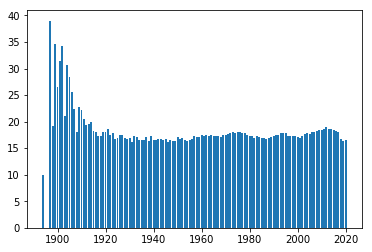

In [130]:
plt.bar(gb.index, gb['TITLE_len'])
plt.ylim()

Можно заметить что фильмы, снятые до 1920го года в среднем имеют длиннее названия чем более позднее. Давайте применим линейную регрессию чтобы получить линейную зависимость размера названия фильма от года его выпуска

In [133]:
def get_linargs(x,y):
    b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
    b0 = np.mean(y) - b1 * np.mean(x)
    return b1, b0

In [135]:
x1 = gb.index
y1 = gb['TITLE_len']
b11, b10 = get_linargs(x1, y1)
b11, b10

(-0.04104047603776188, 98.7671784035158)

Чтож, мы получили линейное уравнение вида
$$y = 98.7672 - 0.041 \cdot x$$
Визуализируем полученные результаты на графике еще раз:

(12, 40)

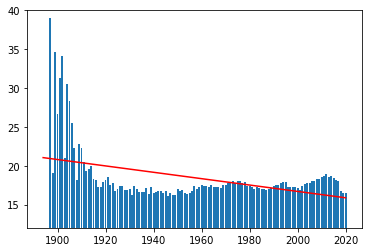

In [175]:
plt.bar(x1, gb['TITLE_len'])
plt.plot(x1, b10 + b11*x1, color='red')
plt.ylim(12, 40)

#### Оценка эффективности

Оценим полученные результаты при помощи коэффециента детерминации $R_2$

In [109]:
from sklearn.metrics import r2_score
r2_score(y1, b0 + b1*x1)

0.155219187753868

Результат в 15% говорит о том что зависимость есть, но она минимальна.

#### Дальнейшие изыскания
Современные фильмы чаще всего называются по формуле $$[название] [номер]: [пояснение \ части]$$
Давайте сделаем допущение что нас интересует лишь название фильма и мы отсечем пояснение части. Для этого отделим от названия всё что после ":"

In [137]:
df['TITLE_len_split'] = np.array([len(i.split(":")[0]) for i in df['TITLE']])

In [138]:
gb = df.groupby(['YEAR']).mean().drop(['RUNTIME'], axis=1)

In [171]:
gb

,TITLE_len,TITLE_len_split
YEAR,,
1894.0,10.000000,10.000000
1897.0,39.000000,39.000000
1898.0,19.115385,19.115385
1899.0,34.583333,34.583333
1900.0,26.600000,26.600000
1901.0,31.333333,31.333333
1902.0,34.166667,34.166667
1903.0,21.000000,19.727273
1904.0,30.571429,30.571429


Используем регрессионную модель

In [173]:
x2 = gb.index
y2 = gb['TITLE_len_split']
b21, b20 = get_linargs(x2, y2)
b21, b20

(-0.060493870444717955, 136.08076478942684)

И вычислим коэффециент детерминации

In [174]:
r2_score(y2, b20 + b21*x2)

0.30140122278219206

Результат куда более интересен. Давайте сравним два результата графически:

(13, 40)

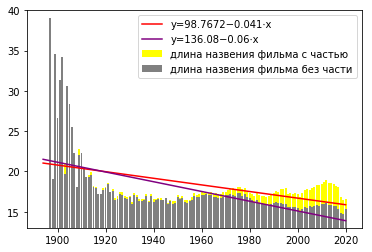

In [165]:
plt.bar(x1, y1, color='yellow', label='длина назвения фильма с частью')
plt.bar(x2, y2, color='grey', label='длина назвения фильма без части')
plt.plot(x1, b10 + b11*x1, color='red', label='y=98.7672−0.041⋅x')
plt.plot(x2, b20 + b21*x2, color='purple', label='y=136.08−0.06⋅x')
plt.legend()
plt.ylim(13, 40)

Какой я могу вывести результат - 
если обрезать название фильма до слов до символа ":" то выдвинутая гипотеза сходится: <br/> __Чем моложе фильм, тем короче его название__

In [183]:
df = pd.read_csv(tsv_path)
df.dropna(subset=['GENRE'], inplace=True)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414531 entries, 0 to 487627
Data columns (total 5 columns):
ID         414531 non-null object
TITLE      414531 non-null object
YEAR       369431 non-null float64
RUNTIME    281955 non-null float64
GENRE      414531 non-null object
dtypes: float64(2), object(3)
memory usage: 19.0+ MB


In [188]:
genres = set()
for line in df.GENRE:
    for g in line.split(','):
        genres.add(g)
genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}